## Topic Modelling LSA 

Latent semantic analysis (LSA) adalah teknik dalam pemrosesan bahasa alami , khususnya semantik distribusional , menganalisis hubungan antara satu set dokumen dan istilah yang dikandungnya dengan menghasilkan satu set konsep yang terkait dengan dokumen dan istilah. 
langkah-langkah LSA sebagai berikut:
1. Teks Preprocessing
2. Term-document Matrix
3. Singular Value Decomposition
Singular Value Decomposition (SVD) adalah salah satu teknik reduksi dimensi yang bermanfaat untuk memperkecil nilai kompleksitas dalam pemrosesan term-document matrix. SVD merupakan teorema aljabar linier yang menyebutkan bahwa persegi panjang dari term-document matrix dapat dipecah/didekomposisikan menjadi tiga matriks, yaitu :
– Matriks ortogonal U
– Matriks diagonal S
– Transpose dari matriks ortogonal V
Yang dirumuskan dengan :

$A_{m n}=U_{m m} x S_{m n} x V_{n n}^{T}$

Keterangan:

$$\begin{array}{ll}\mathrm{A}_{\mathrm{mn}}= & \text { matriks awal } \\ \mathrm{U}_{\mathrm{mm}}= & \text { matriks ortogonal U } \\ \mathrm{S}_{\mathrm{mn}}= & \text { matriks diagonal } \mathrm{s} \\ \mathrm{V}_{n \pi}^{\top}= & \text { transpose matriks ortogonal } \mathrm{V}\end{array}$$

Hasil dari proses SVD adalah vektor yang akan digunakan untuk menghitung similaritasnya dengan pendekatan cosine similarity.

4. Cosine Similarity Measurement
Cosine similarity digunakan untuk menghitung nilai kosinus sudut antara vektor dokumen dengan vektor kueri. Semakin kecil sudut yang dihasilkan, maka tingkat kemiripan esai semakin tinggi.
Formula dari cosine similarity adalah sebagai berikut:

\begin{equation}
\cos \alpha=\frac{\boldsymbol{A} \cdot \boldsymbol{B}}{|\boldsymbol{A}||\boldsymbol{B}|}=\frac{\sum_{i=1}^{n} \boldsymbol{A}_{i} X \boldsymbol{B}_{i}}{\sqrt{\sum_{i=1}^{n}\left(\boldsymbol{A}_{i}\right)^{2}} X \sqrt{\sum_{i=1}^{n}\left(\boldsymbol{B}_{i}\right)^{2}}}
\end{equation}
 
Keterangan:

A $\quad=$ vektor dokumen

B $\quad=$ vektor kueri

A $\cdot \mathbf{B}=$ perkalian $\operatorname{dot}$ vektor $\mathrm{A}$ dan vektor $\mathrm{B}$

$|\mathrm{A}| \quad=$ panjang vektor $\mathrm{A}$

$\left.\right|^{\boldsymbol{B}} \mid \quad=$ panjang vektor $B$

$\mid \boldsymbol{A}_{|| \mathrm{B} \mid}=$ cross product antara $|\mathrm{A}|$ dan $|\mathrm{B}|$


Dari hasil cosine similarity, akan didapatkan nilai yang akan dibandingkan dengan penilaian manusia untuk diuji selisih nilainya.

In [16]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=50, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [17]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.06882448  0.27245523 -0.00387394 ...  0.14532464  0.00134145
   0.00661104]
 [ 0.56578288 -0.25181322 -0.24192285 ...  0.09406852  0.09104575
   0.02513334]
 [ 0.2734554  -0.13616611  0.72362478 ... -0.01284269 -0.31929787
   0.0739685 ]
 ...
 [ 0.54043373 -0.28470221 -0.18874866 ... -0.02306753  0.0146919
  -0.09316259]
 [ 0.15848935  0.10863096  0.06272179 ...  0.01203472  0.03770214
   0.01633764]
 [ 0.532259   -0.0269196  -0.14266228 ... -0.00155156 -0.00797086
   0.0377059 ]]
(50, 50)


In [18]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  6.882448356653467
Topic  1  :  27.24552321029806
Topic  2  :  -0.38739398904237504
Topic  3  :  24.38173039473795
Topic  4  :  1.8496010417855302
Topic  5  :  14.060404487449501
Topic  6  :  64.91171302028877
Topic  7  :  12.589149754545993
Topic  8  :  -12.156488745115082
Topic  9  :  -35.43167579935794
Topic  10  :  6.200957404255839
Topic  11  :  -2.721771808514066
Topic  12  :  -3.3518781141456317
Topic  13  :  -2.766649136370064
Topic  14  :  6.247612390914547
Topic  15  :  -1.4616632405353294
Topic  16  :  -0.8364506365120918
Topic  17  :  0.18099297588821578
Topic  18  :  0.6677569410536411
Topic  19  :  -2.9036953440621716
Topic  20  :  0.8525393554096086
Topic  21  :  4.31850613751586
Topic  22  :  -3.794730391180355
Topic  23  :  -2.641639696343228
Topic  24  :  -0.27325688435625023
Topic  25  :  -0.7573868440355351
Topic  26  :  2.178185992685262
Topic  27  :  2.5221304613252062
Topic  28  :  1.9349818406295256
Topic  29  :  -0.839378807724718
Topic

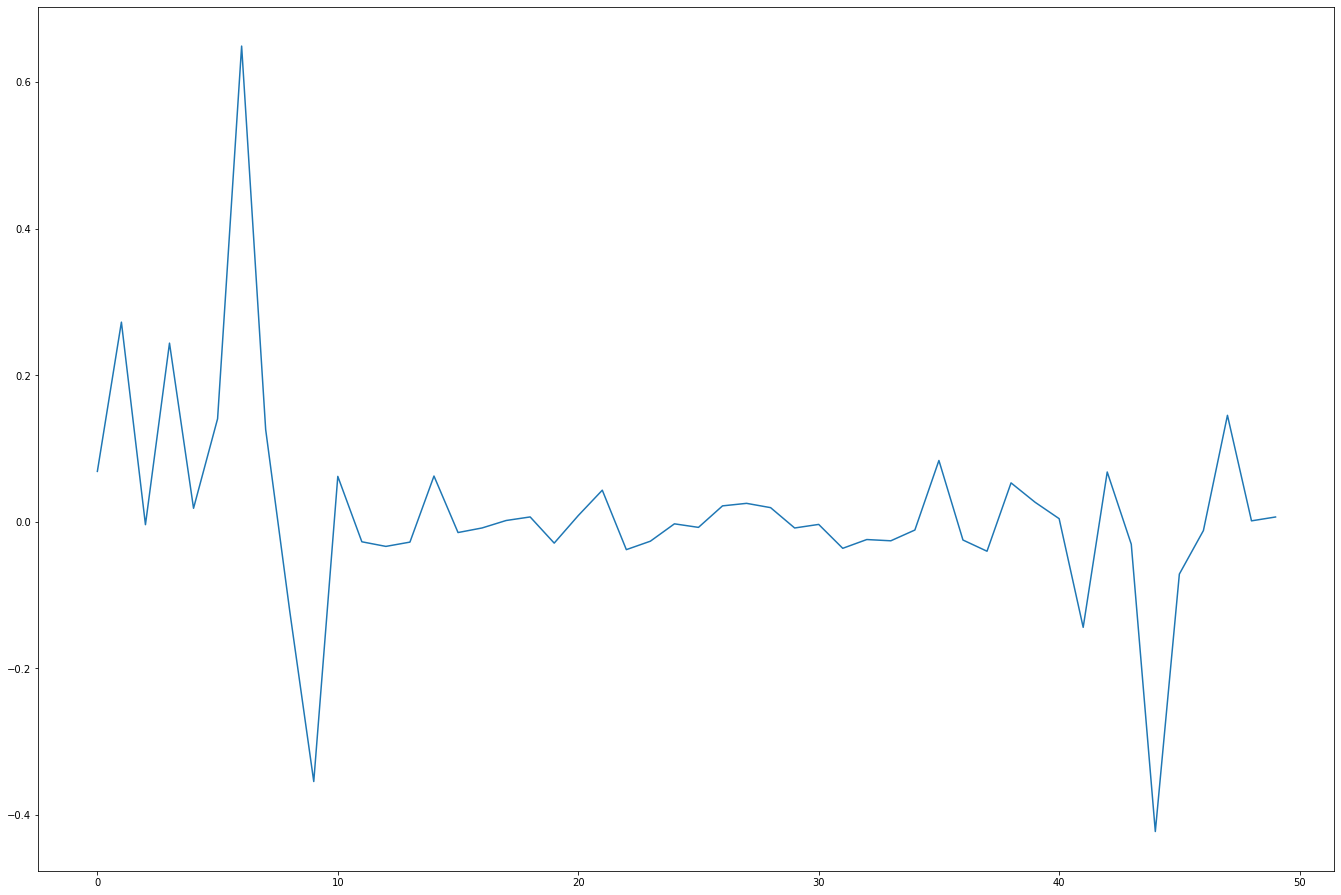

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
Nilai = topic
topic2 = l
ax.plot(topic2)
plt.show()

In [20]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(50, 1000)
[[ 0.02083154  0.00613697  0.01351605 ...  0.00548304  0.02083154
   0.03124731]
 [ 0.00027003  0.00933731 -0.00565027 ... -0.0051317   0.00027003
   0.00040504]
 [-0.00591647  0.00098918 -0.00082242 ...  0.03121209 -0.00591647
  -0.0088747 ]
 ...
 [ 0.02481044  0.00279789 -0.00438256 ... -0.00236904  0.02481044
   0.03721567]
 [ 0.00406422 -0.00223938  0.00771051 ... -0.07394541  0.00406422
   0.00609632]
 [-0.01521117 -0.00326002  0.03188588 ...  0.021489   -0.01521117
  -0.02281675]]


In [21]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 0: 
citra wajah pengenalan data proses sistem metode tulisan tangan penelitian 

Topic 1: 
pembelajaran bahasa madura game siswa aplikasi teknologi pendidikan guru kriteria 

Topic 2: 
sidik jari minutiae corepoint otomatis skenario nilai ridge geometry lakukan 

Topic 3: 
pembelajaran bahasa game wajah madura sidik jari aplikasi siswa citra 

Topic 4: 
tulisan tangan huruf telapak pengenalan karakter carakan pola arah orang 

Topic 5: 
dokumen plagiarisme nilai similarity fingerprint gram index latent semantik svd 

Topic 6: 
game madura sapi budaya bahasa karapan kerapan html kriteria tulisan 

Topic 7: 
peramalan straw mse produksi error kebutuhan square single mape komputer 

Topic 8: 
bahasa rule madura data support teknik pohon mahasiswa prediksi keputusan 

Topic 9: 
bahasa madura siswa peramalan tangan produksi tulisan single dasar obyek 

Topic 10: 
bangkalan jalan pertanian kondisi lahan tanaman bahasa madura arsitektur togaf 

Topic 11: 
suara karakter citra filter aku

### Daftar Pustaka
- Nawassyarif, Julkarnain M, K. R. A. (2020). 338108-sistem-informasi-pengolahan-data-ternak-30b9d1b3 ( Pengertian Sistem infomasi. Jurnal JINTEKS, 2(1), 32–39.
- Hanifah, R., & Nurhasanah, I. S. (2018). Implementasi Web Crawling Untuk Mengumpulkan Web Crawling Implementation for Collecting. Jurnal Teknologi Informasi Dan Ilmu Komputer (JTIIK), 5(5), 531–536. https://doi.org/10.25126/jtiik20185842
- https://docs.scrapy.org/en/latest/intro/tutorial.html
- Setyohadi, D. B., Kristiawan, F. A., & Ernawati, E. (2017). Perbaikan Performansi Klasifikasi Dengan Preprocessing Iterative Partitioning Filter Algorithm. Telematika, 14(01), 12–20. https://doi.org/10.31315/telematika.v14i01.1960
- Merinda Lestandy, Abdurrahim Abdurrahim, & Lailis Syafa’ah. (2021). Analisis Sentimen Tweet Vaksin COVID-19 Menggunakan Recurrent Neural Network dan Naïve Bayes. Jurnal RESTI (Rekayasa Sistem Dan Teknologi Informasi), 5(4), 802–808. https://doi.org/10.29207/resti.v5i4.3308
- Prihatini, P. M. (2016). Implementasi Ekstraksi Fitur Pada Pengolahan Dokumen Berbahasa Indonesia. Jurnal Matrix, 6(3), 174–178.
- https://socs.binus.ac.id/2015/08/03/penggunaan-latent-semantic-analysis-lsa-dalam-pemrosesan-teks/
- https://www.kaggle.com/code/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn/notebook